In [87]:
import pandas as pd
import matplotlib.pyplot as plt
print('20127250 \nHo Thi Thanh Ngan')
#Github: https://github.com/Nganho22/rvPython

20127250 
Ho Thi Thanh Ngan


In [88]:
df_DT1 = pd.read_csv("https://raw.githubusercontent.com/Nganho22/rvPython/main/Data_Train_p1.csv?token=GHSAT0AAAAAACJTB3H6ILWNTDLTUEOWDVDCZJ7G72A", header=0, index_col=None)
df_DT1.head()
df = pd.read_excel("film_sales_S2.xlsx")
df.head()
df['occu_perc'] = df['occu_perc'].round(2)
df.to_csv("film_sales.csv")

In [89]:
df_DT2 = pd.read_csv("https://raw.githubusercontent.com/Nganho22/rvPython/main/Data_Train_p2.csv", header=0, index_col=None)
df_DT2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,15/05/2019,Delhi,Cochin,DEL → HYD → COK,06:50,16:10,9h 20m,1 stop,No info,6442
1,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,08:25,16:20,7h 55m,1 stop,In-flight meal not included,10844
2,Jet Airways,18/05/2019,Mumbai,Hyderabad,BOM → HYD,10:20,11:50,1h 30m,non-stop,No info,5678
3,IndiGo,12/04/2019,Banglore,Delhi,BLR → DEL,23:30,02:20 13 Apr,2h 50m,non-stop,No info,6906
4,SpiceJet,21/05/2019,Chennai,Kolkata,MAA → CCU,09:45,12:00,2h 15m,non-stop,No check-in baggage included,3543


In [90]:
#1. Đọc file dữ liệu vào pandas data frame (Data_Train_p1,Data_Train_p2)
DT1 = pd.DataFrame(df_DT1)
DT2 = pd.DataFrame(df_DT2)

In [91]:
#2. Merge hai file dữ liệu
merged_DT = pd.merge(DT1, DT2, how='outer')
print(merged_DT)

                 Airline Date_of_Journey    Source Destination  \
0                 IndiGo      24/03/2019  Banglore   New Delhi   
1              Air India       1/05/2019   Kolkata    Banglore   
2            Jet Airways       9/06/2019     Delhi      Cochin   
3                 IndiGo      12/05/2019   Kolkata    Banglore   
4                 IndiGo      01/03/2019  Banglore   New Delhi   
...                  ...             ...       ...         ...   
10619          Air India      27/03/2019     Delhi      Cochin   
10620             IndiGo      27/06/2019   Chennai     Kolkata   
10621  Multiple carriers      21/05/2019     Delhi      Cochin   
10622        Jet Airways      24/03/2019   Kolkata    Banglore   
10623        Jet Airways      24/03/2019   Kolkata    Banglore   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7

In [92]:
#3. Cho biết dữ liệu có bao nhiêu dòng?
n = merged_DT.shape[0]
print("Tong so dong du lieu la:", n)

Tong so dong du lieu la: 10624


In [93]:
#4. Có missing value ở thuộc tính nào không?
Tong_missing_values = merged_DT.isna().sum()
print("Tong gia tri bi missing o moi thuoc tinh la:")
print(Tong_missing_values)

Tong gia tri bi missing o moi thuoc tinh la:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [94]:
# Xu ly missing cot Route
missing_rows_Route = merged_DT[merged_DT['Route'].isnull()]

print('Cac Row bi missing tai column Route:')
print(missing_rows_Route)
missing_duration = missing_rows_Route[['Duration','Airline','Price']]

for i in range(missing_rows_Route.shape[0]):
    filtered_r = merged_DT.loc[
        (merged_DT['Duration'] == missing_duration.iloc[i]['Duration']) &
        (merged_DT['Airline'] == missing_duration.iloc[i]['Airline']) &
        (merged_DT['Price'] == missing_duration.iloc[i]['Price'])
    ]['Route'].drop_duplicates()
    
    route_counts = filtered_r.value_counts()
    most_common_route = route_counts.idxmax()
    merged_DT.at[missing_rows_Route.index[i],'Route'] = most_common_route

print('\n Cac row bi missing tai column Route sau khi xu ly:')    
for i in range(missing_rows_Route.shape[0]):
    print(merged_DT.iloc[missing_rows_Route.index[i]])




Cac Row bi missing tai column Route:
        Airline Date_of_Journey Source Destination Route Dep_Time  \
7228  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
7228  09:25 07 May  23h 40m         NaN         No info   7480  

 Cac row bi missing tai column Route sau khi xu ly:
Airline                  Air India
Date_of_Journey          6/05/2019
Source                       Delhi
Destination                 Cochin
Route              DEL → MAA → COK
Dep_Time                     09:45
Arrival_Time          09:25 07 May
Duration                   23h 40m
Total_Stops                    NaN
Additional_Info            No info
Price                         7480
Name: 7228, dtype: object


In [95]:

# Xu ly missing cot Total Stop

missing_rows_TotalStop = merged_DT[merged_DT['Total_Stops'].isnull()]
print('Cac Row bi missing tai column Total_Stop:')
print(missing_rows_TotalStop)

for i in range(missing_rows_TotalStop.shape[0]):
    count_arrows = missing_rows_TotalStop.iloc[i]['Route'].count('→') + 1
    merged_DT.at[missing_rows_TotalStop.index[i],'Total_Stops'] = count_arrows

print('\n Cac row bi missing tai column Total_Stop sau khi xu ly:')    
for i in range(missing_rows_TotalStop.shape[0]):
    print(merged_DT.iloc[missing_rows_TotalStop.index[i]])


Tong_missing_values = merged_DT.isna().sum()
print("\nTong gia tri bi missing o moi thuoc tinh la:")
print(Tong_missing_values)


Cac Row bi missing tai column Total_Stop:
        Airline Date_of_Journey Source Destination            Route Dep_Time  \
7228  Air India       6/05/2019  Delhi      Cochin  DEL → MAA → COK    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
7228  09:25 07 May  23h 40m         NaN         No info   7480  

 Cac row bi missing tai column Total_Stop sau khi xu ly:
Airline                  Air India
Date_of_Journey          6/05/2019
Source                       Delhi
Destination                 Cochin
Route              DEL → MAA → COK
Dep_Time                     09:45
Arrival_Time          09:25 07 May
Duration                   23h 40m
Total_Stops                      3
Additional_Info            No info
Price                         7480
Name: 7228, dtype: object

Tong gia tri bi missing o moi thuoc tinh la:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Durat

In [96]:
#5. Có duplicate dữ liệu không?
row_duplicate = merged_DT.duplicated()
Tong_row_duplicate = row_duplicate.sum()

print("cac hang bi trung lap:")
print(merged_DT[row_duplicate])
print("\nTong hang trung lap:")
print(Tong_row_duplicate)




cac hang bi trung lap:
           Airline Date_of_Journey    Source Destination  \
34     Jet Airways      15/06/2019     Delhi      Cochin   
51     Jet Airways      27/06/2019     Delhi      Cochin   
52     Jet Airways      27/06/2019     Delhi      Cochin   
77     Jet Airways      24/06/2019     Delhi      Cochin   
86     Jet Airways      24/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
8999   Jet Airways       1/06/2019     Delhi      Cochin   
9898   Jet Airways       1/06/2019     Delhi      Cochin   
9908   Jet Airways       9/05/2019     Delhi      Cochin   
9957   Jet Airways       9/06/2019     Delhi      Cochin   
10623  Jet Airways      24/03/2019   Kolkata    Banglore   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
34     DEL → NAG → BOM → COK    14:35  12:35 16 Jun      22h     2 stops   
51     DEL → AMD → BOM → COK    23:05  19:00 28 Jun  19h 55m     2 stops   
52     DEL → AMD → BOM → COK

In [97]:
#6. Kiểu dữ liệu các thuộc tính là gì
print(merged_DT.dtypes)

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object


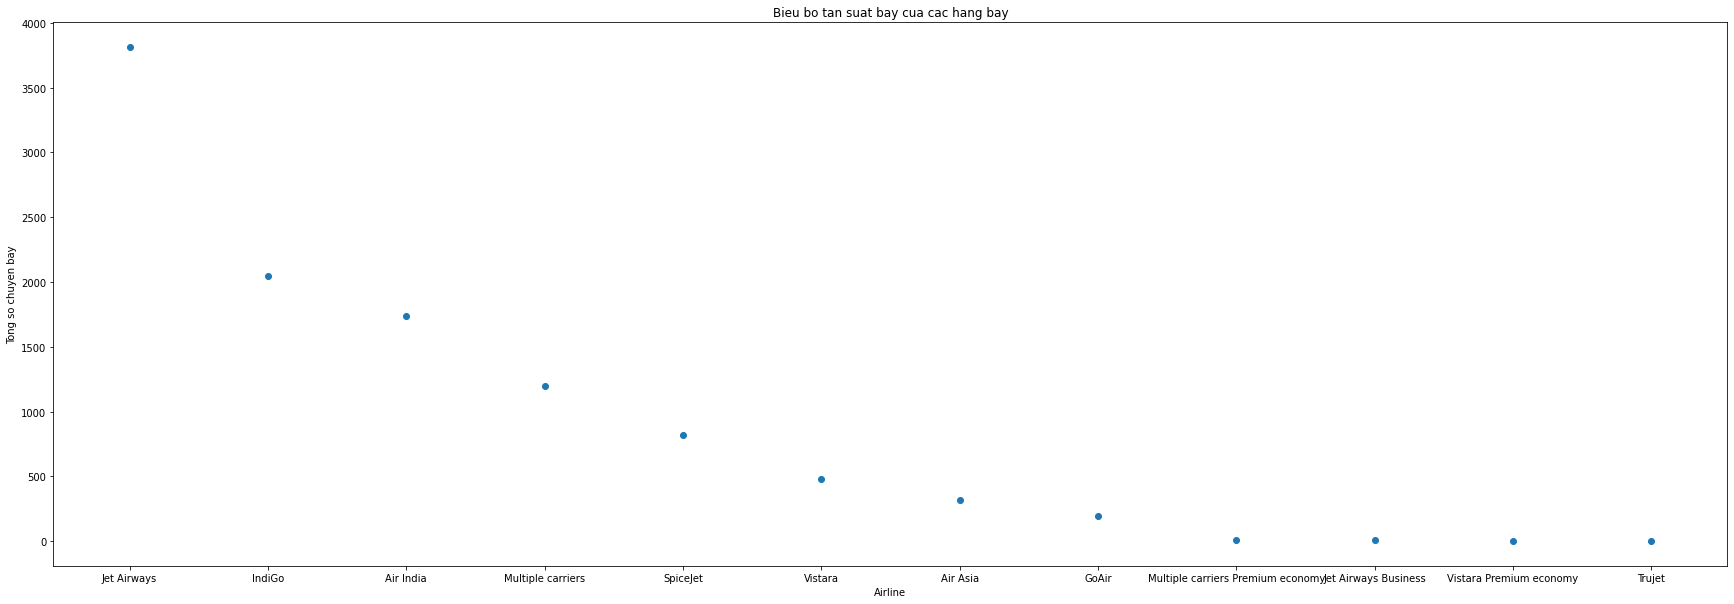

In [98]:
#7. Vẽ biểu đồ quan sát phân bố của dữ liệu
#Scatterplot
merged_DT.drop_duplicates()

Tan_suat = merged_DT['Airline'].value_counts()
plt.figure(figsize=(30,10))
plt.scatter(Tan_suat.index, Tan_suat.values)
plt.xlabel('Airline')
plt.ylabel('Tong so chuyen bay')
plt.title('Bieu bo tan suat bay cua cac hang bay')
plt.show()



Text(0.5, 1.0, 'Ti trong bay cua cac hang bay')

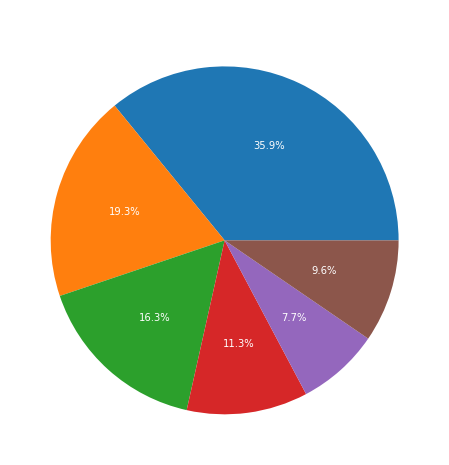

In [99]:
#pie
top_airlines = Tan_suat.nlargest(5)
other_arilines =  Tan_suat[~Tan_suat.index.isin(top_airlines.index)].sum()


top_airlines.loc['khac'] = other_arilines
text_color='white'
plt.figure(figsize=(16,8))
plt.pie(top_airlines.values, labels=top_airlines.index, autopct='%1.1f%%', shadow=False, textprops={'color': text_color})
plt.title('Ti trong bay cua cac hang bay', color='white')



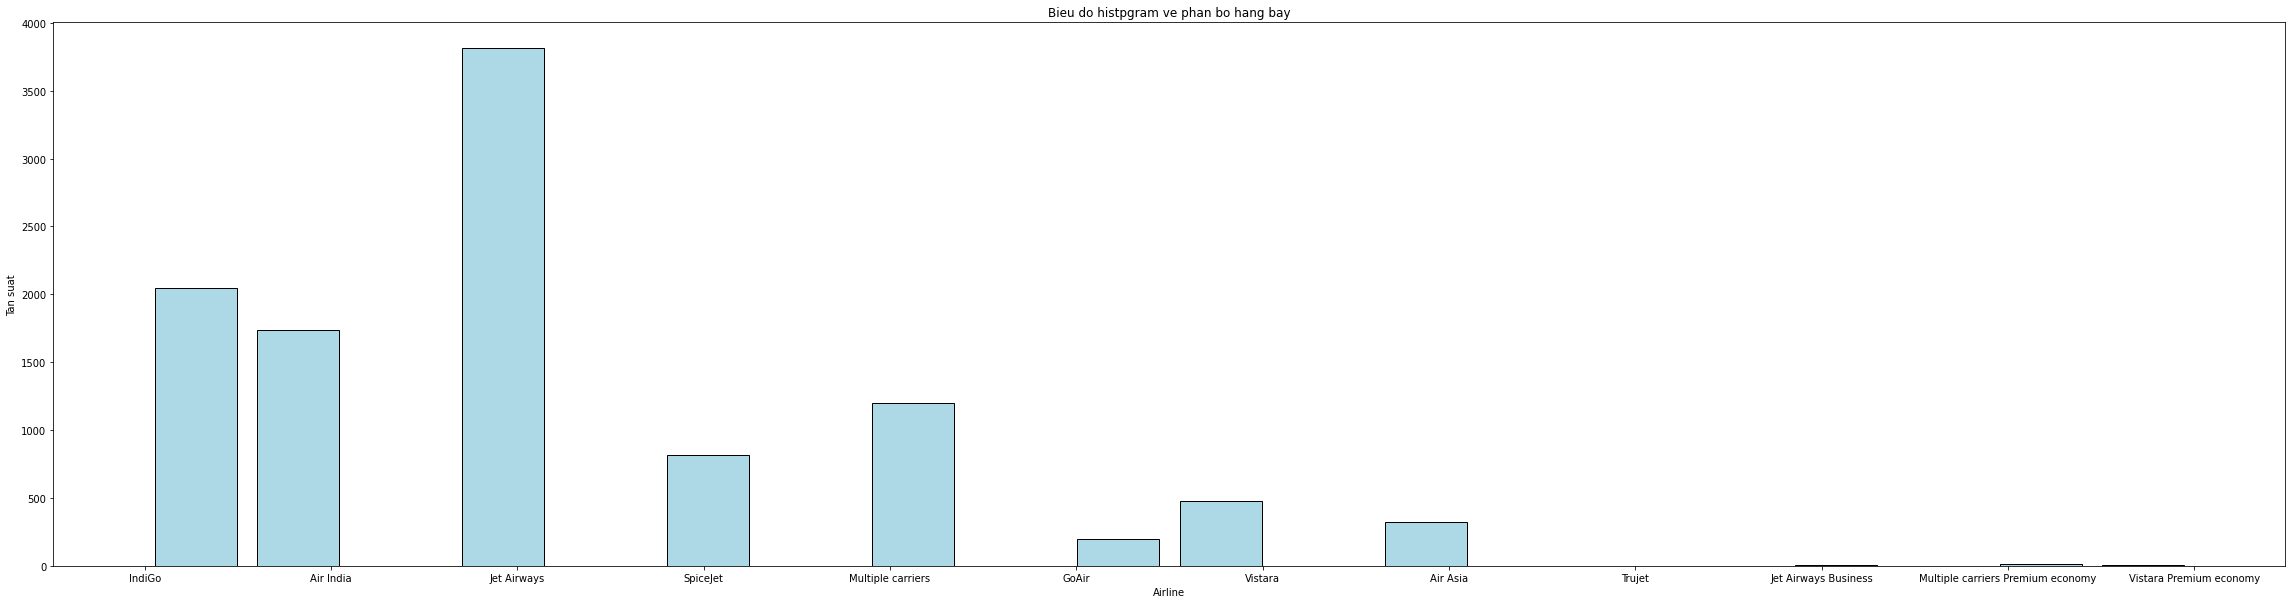

In [100]:
#Histogram
plt.figure(figsize=(40,10))
plt.hist(merged_DT['Airline'], bins=20, color='lightblue', edgecolor='black', rwidth=0.8)
plt.title('Bieu do histpgram ve phan bo hang bay')
plt.xlabel('Airline')
plt.ylabel('Tan suat')
plt.show()

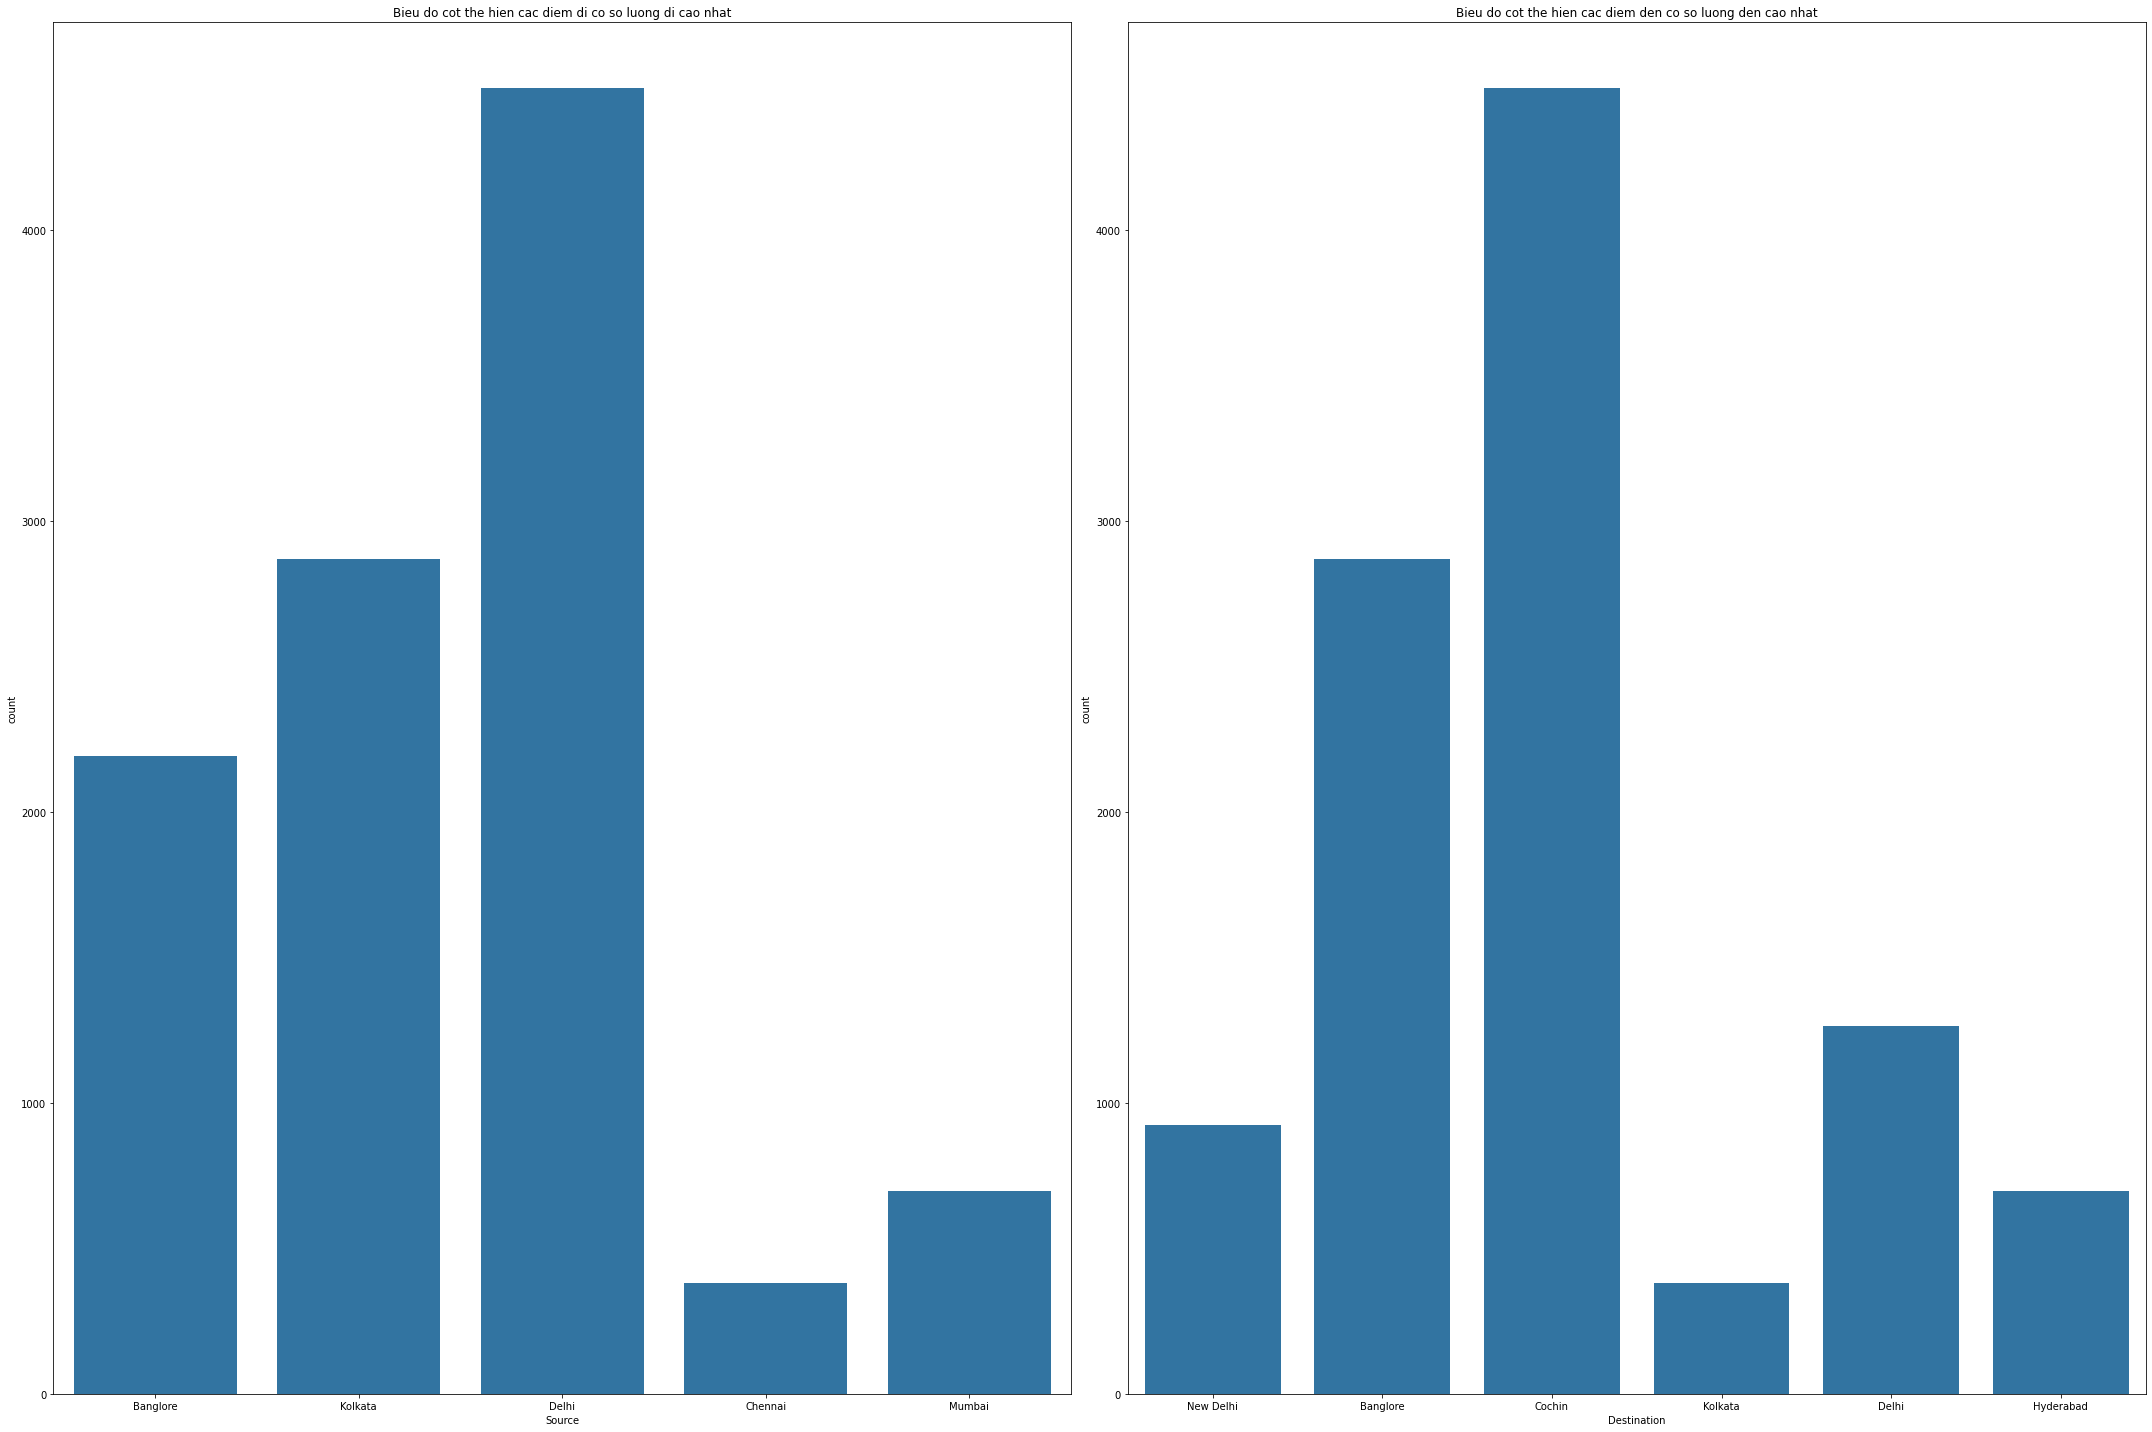

In [101]:
import seaborn as sns
plt.figure(figsize=(30, 20))


#Bar
plt.subplot(1, 2, 1)
sns.countplot(x='Source', data=merged_DT)
plt.title('Bieu do cot the hien cac diem di co so luong di cao nhat')

plt.subplot(1, 2, 2)
sns.countplot(x='Destination', data=merged_DT)
plt.title('Bieu do cot the hien cac diem den co so luong den cao nhat')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Tong Thu nhap cac hang bay')

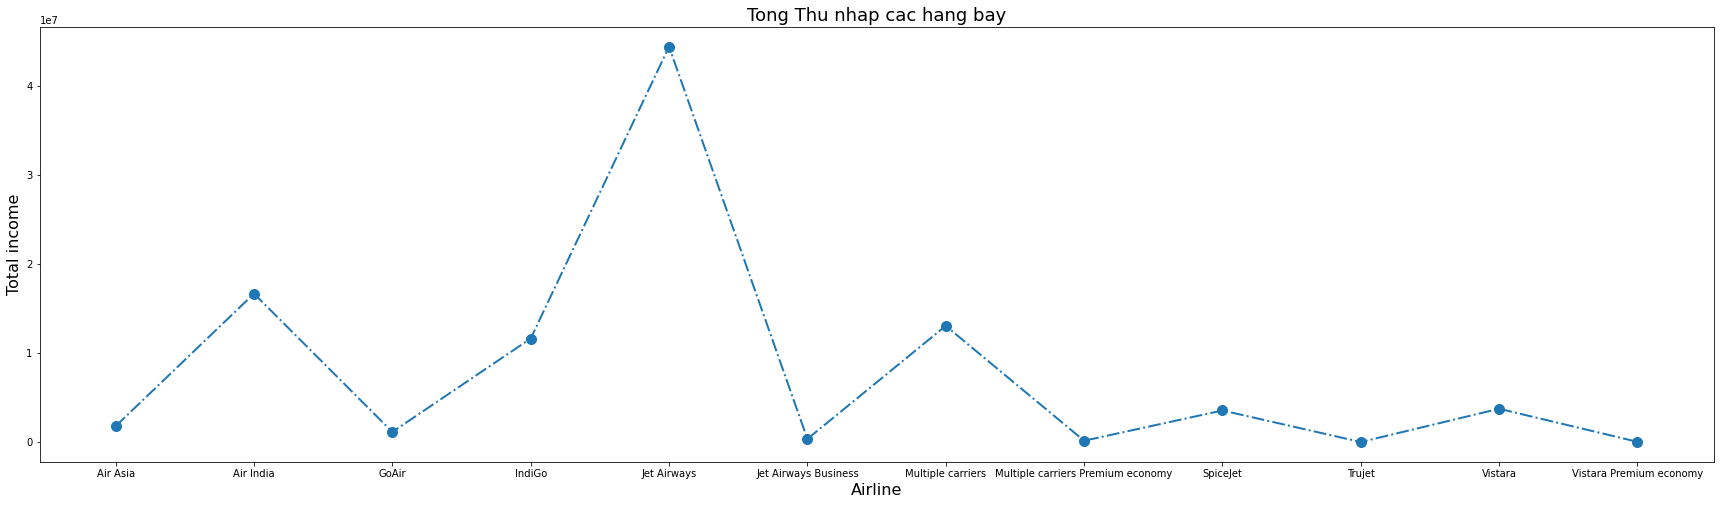

In [102]:
#Line
import numpy as np
unique_airlines_prices = merged_DT.groupby('Airline')['Price'].sum()
Plane_price = pd.DataFrame({'Airline': unique_airlines_prices.index, 'Total income': unique_airlines_prices.values})
# Vẽ biểu đồ bboxplot
plt.figure(figsize=(30,8))
plt.plot(Plane_price['Airline'], Plane_price['Total income'], marker='o', markersize=10, linestyle='-.', linewidth=2)
plt.xlabel('Airline', fontsize=16)
plt.ylabel('Total income', fontsize=16)
plt.title('Tong Thu nhap cac hang bay', fontsize=18)

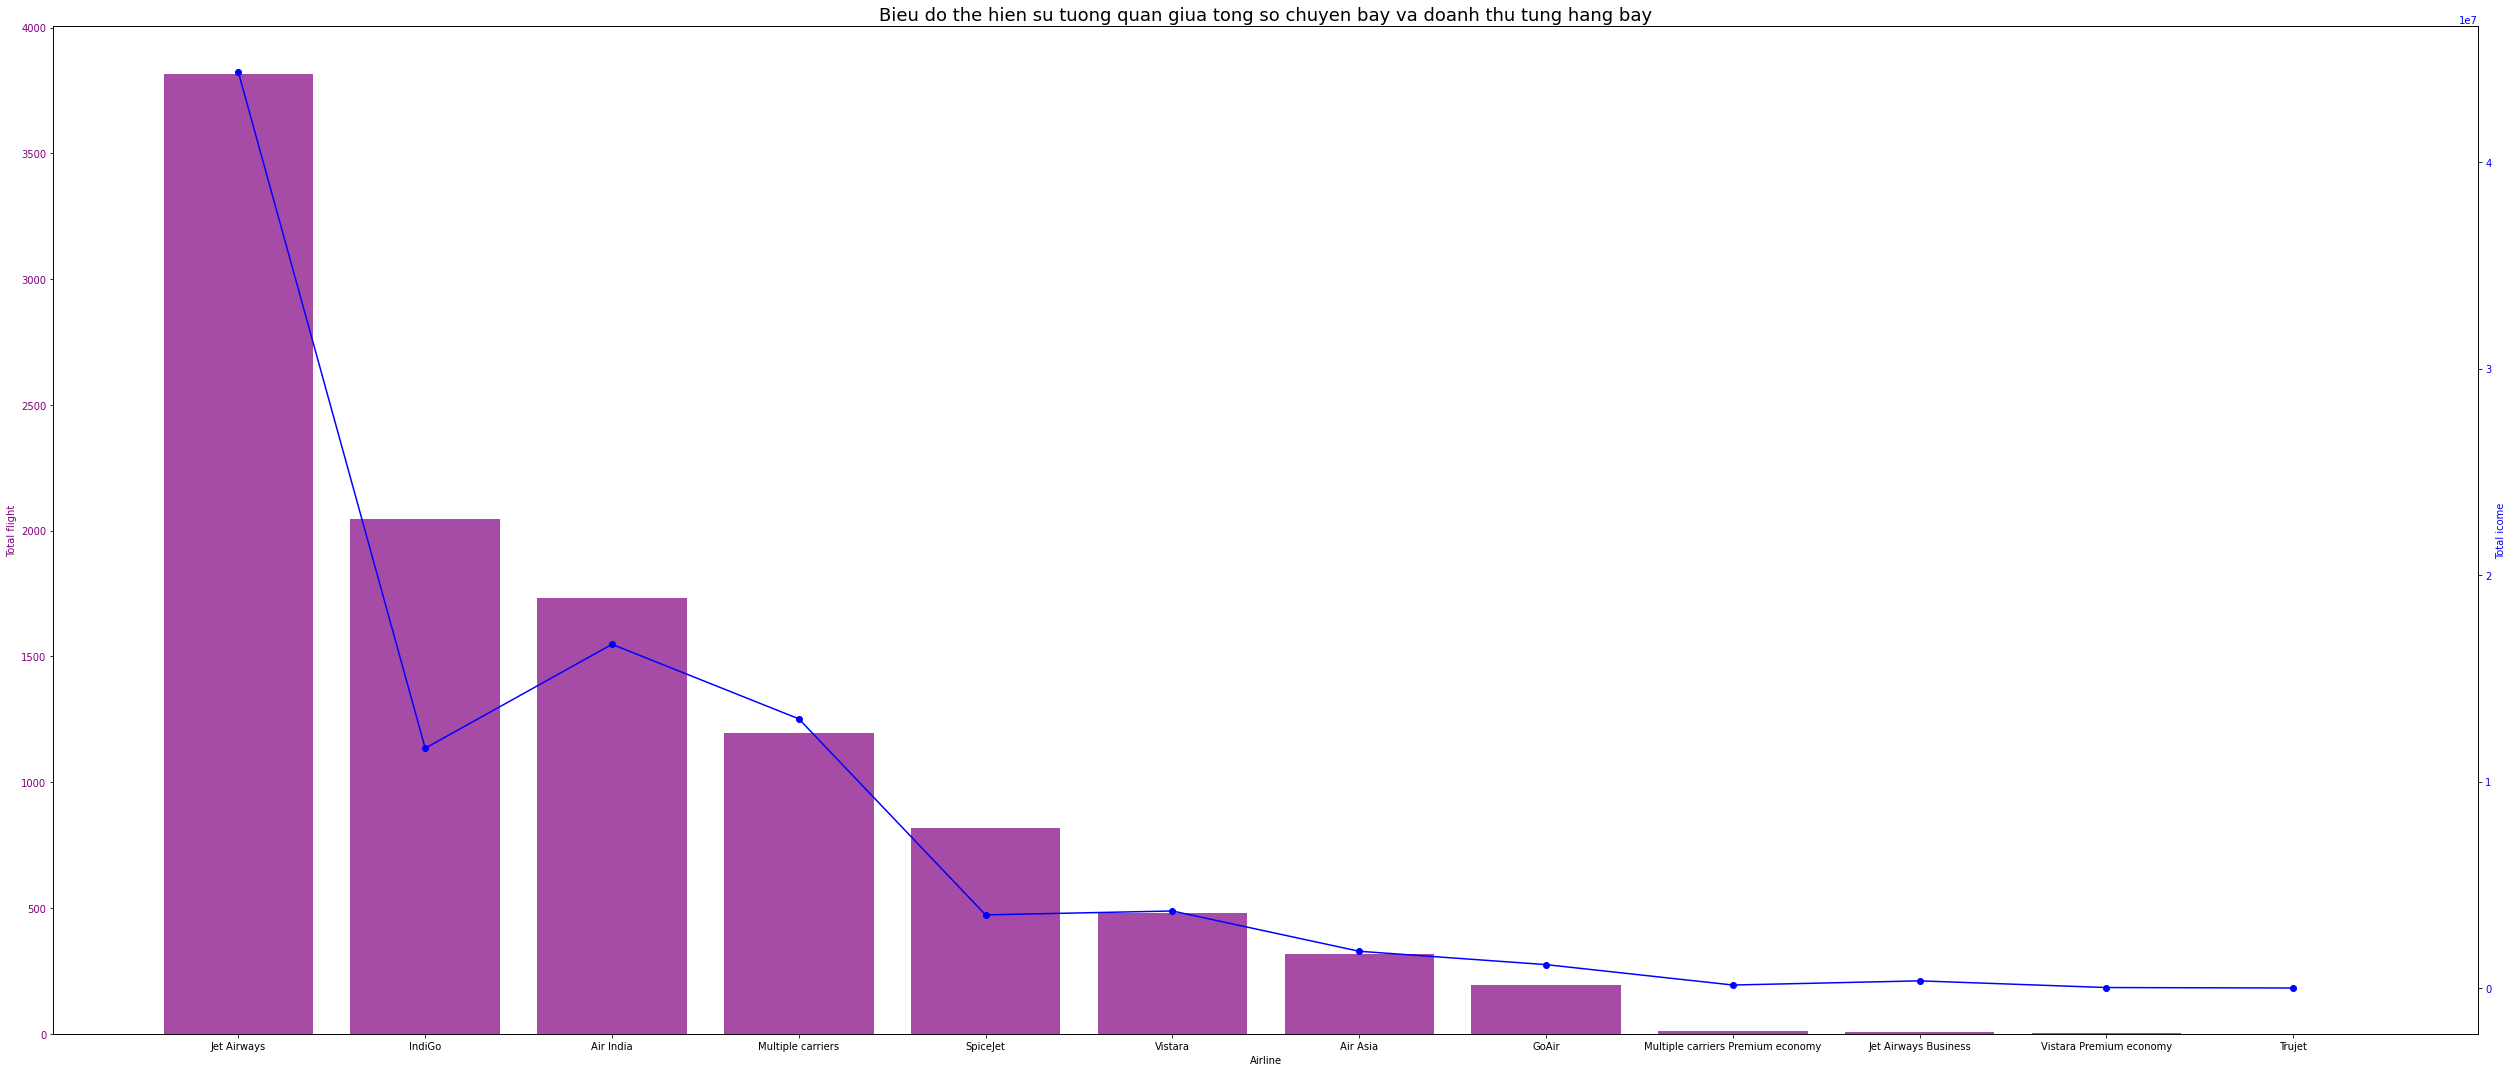

In [103]:
#Bar+Line
Plane_count = pd.DataFrame({'Airline': Tan_suat.index, 'Total flight': Tan_suat.values})

Air = pd.merge(Plane_count, Plane_price, on='Airline')
fig, ax1 = plt.subplots(figsize=(35,15))

ax1.bar(Air['Airline'], Air['Total flight'], color='purple', alpha=0.7, label='Total Flight')
ax1.set_xlabel('Airline')
ax1.set_ylabel('Total flight', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

ax2 = ax1.twinx()
ax2.plot(Air['Airline'], Air['Total income'], color='blue', marker='o', label='Total income')
ax2.set_ylabel('Total icome', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Bieu do the hien su tuong quan giua tong so chuyen bay va doanh thu tung hang bay', fontsize=18)
fig.tight_layout()
plt.show()



In [104]:
# 6. Giá có thay đổi tùy theo hãng hàng không hay không?
airlinegroup = merged_DT.groupby(['Airline','Source', 'Destination'])['Price'].mean().round(2)
print(airlinegroup)


Airline                            Source    Destination
Air Asia                           Banglore  Delhi           4265.58
                                             New Delhi       5791.94
                                   Delhi     Cochin          7804.18
                                   Kolkata   Banglore        5012.32
Air India                          Banglore  Delhi           6045.17
                                             New Delhi      11061.95
                                   Chennai   Kolkata         5895.64
                                   Delhi     Cochin          9995.49
                                   Kolkata   Banglore       10341.36
                                   Mumbai    Hyderabad       6260.05
GoAir                              Banglore  Delhi           4050.29
                                             New Delhi       7532.33
                                   Delhi     Cochin          6587.16
                                   Kolkata   B

In [105]:

airlinegroup = merged_DT.groupby(['Airline','Source', 'Destination'])['Price'].mean().round(2)
print(airlinegroup)
# Tạo một DataFrame mới để chứa giá vé dựa trên Source và Destination
heatmap_data = airlinegroup.pivot_table(index='Source', columns='Destination', values='Price', aggfunc='mean')

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".0f", cbar_kws={'label': 'Giá vé'})
plt.title('Heatmap: Sự thay đổi giá vé theo Source và Destination')
plt.show()



Airline                            Source    Destination
Air Asia                           Banglore  Delhi           4265.58
                                             New Delhi       5791.94
                                   Delhi     Cochin          7804.18
                                   Kolkata   Banglore        5012.32
Air India                          Banglore  Delhi           6045.17
                                             New Delhi      11061.95
                                   Chennai   Kolkata         5895.64
                                   Delhi     Cochin          9995.49
                                   Kolkata   Banglore       10341.36
                                   Mumbai    Hyderabad       6260.05
GoAir                              Banglore  Delhi           4050.29
                                             New Delhi       7532.33
                                   Delhi     Cochin          6587.16
                                   Kolkata   B

AttributeError: 'Series' object has no attribute 'pivot_table'

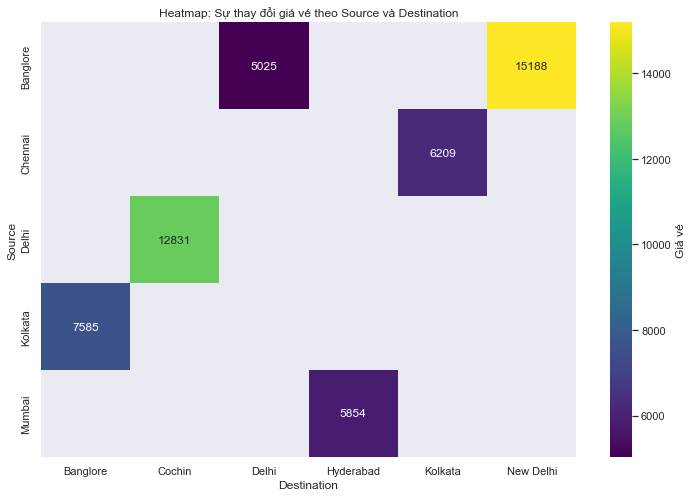

Destination     Banglore     Cochin     Delhi    Hyderabad  Kolkata  \
Source                                                                
Banglore             NaN        NaN  5024.715          NaN      NaN   
Chennai              NaN        NaN       NaN          NaN  6208.86   
Delhi                NaN  12831.016       NaN          NaN      NaN   
Kolkata      7585.148571        NaN       NaN          NaN      NaN   
Mumbai               NaN        NaN       NaN  5854.241667      NaN   

Destination     New Delhi  
Source                     
Banglore     15187.735556  
Chennai               NaN  
Delhi                 NaN  
Kolkata               NaN  
Mumbai                NaN  


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nhóm theo Airline, Source, Destination và tính giá vé trung bình
airlinegroup = merged_DT.groupby(['Airline', 'Source', 'Destination'])['Price'].mean().round(2).reset_index()

# Tạo DataFrame mới để chứa giá vé dựa trên Source và Destination
heatmap_data = airlinegroup.pivot_table(index='Source', columns='Destination', values='Price')

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".0f", cbar_kws={'label': 'Giá vé'})
plt.title('Heatmap: Sự thay đổi giá vé theo Source và Destination')
plt.show()
print(heatmap_data)

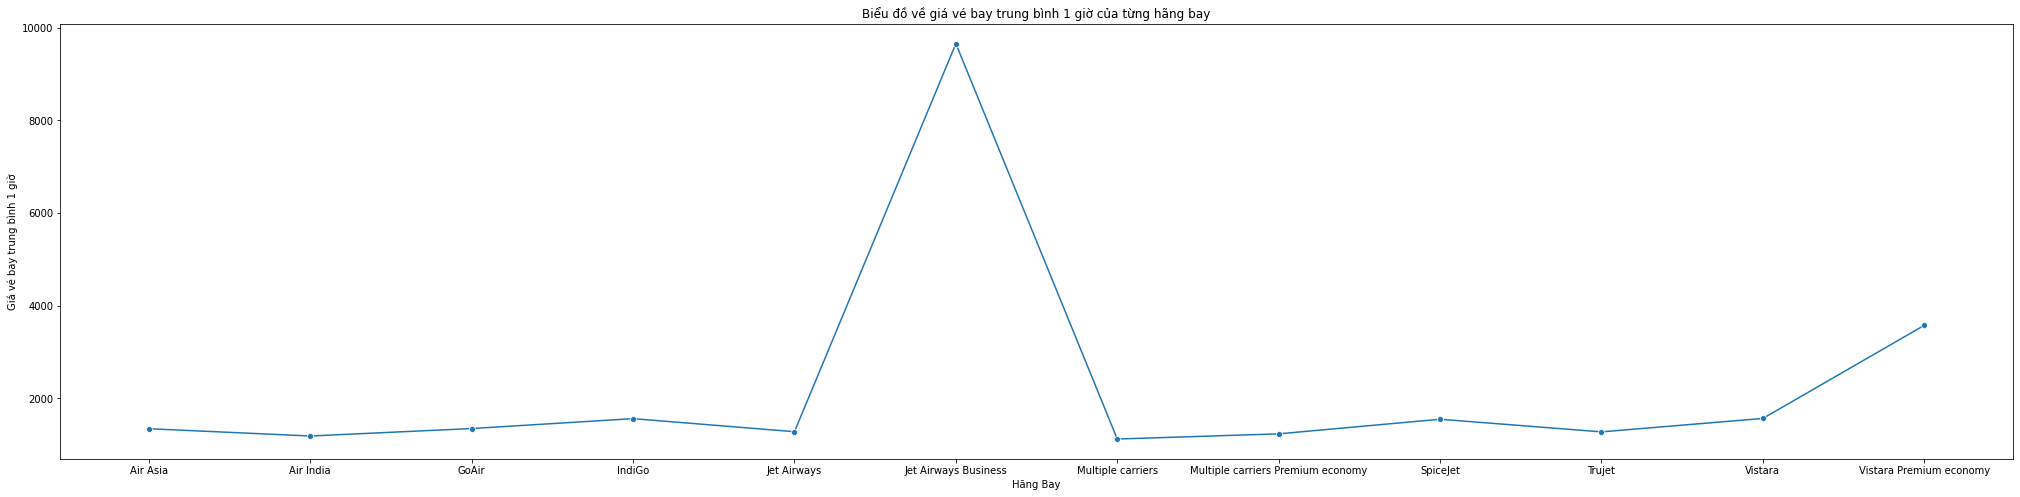

In [133]:

merged_DT['Duration_hours'] = merged_DT['Duration'].str.extract('(\d+)h', expand=False).astype(float)
merged_DT['Duration_minutes'] = merged_DT['Duration'].str.extract('(\d+)m', expand=False).astype(float)
merged_DT['Duration_hours'].fillna(0, inplace=True)
merged_DT['Duration_minutes'].fillna(0, inplace=True)
merged_DT['Duration_total_hour'] = merged_DT['Duration_hours'] + merged_DT['Duration_minutes']/60

merged_DT['Price_per_hour'] = merged_DT['Price']/ merged_DT['Duration_total_hour']
airlinegroup = merged_DT.groupby('Airline')['Price_per_hour'].mean().round(2).reset_index()

plt.figure(figsize=(35, 8))
sns.lineplot(x='Airline', y='Price_per_hour', data=airlinegroup, marker='o')
plt.title('Biểu đồ về giá vé bay trung bình 1 giờ của từng hãng bay')
plt.xlabel('Hãng Bay')
plt.ylabel('Giá vé bay trung bình 1 giờ')
plt.show()



In [134]:
airline_groups = [merged_DT[merged_DT['Airline'] == airline]['Price_per_hour'] for airline in merged_DT['Airline'].unique()]

# Thực hiện one-way ANOVA
f_statistic, p_value = f_oneway(*airline_groups)

# Kiểm tra kết quả
print(f'F-statistic: {f_statistic:.4f}')
print(f'p-value: {p_value:.4f}')

# Kiểm tra giả thiết
alpha = 0.05
if p_value < alpha:
    print("Có đủ bằng chứng để bác bỏ giả thiết H0.")
else:
    print("Không đủ bằng chứng để bác bỏ giả thiết H0.")

F-statistic: 13.2589
p-value: 0.0000
Có đủ bằng chứng để bác bỏ giả thiết H0.


In [135]:
Tong_missing_values = merged_DT.isna().sum()
print("Tong gia tri bi missing o moi thuoc tinh la:")
print(Tong_missing_values)

Tong gia tri bi missing o moi thuoc tinh la:
Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  0
Dep_Time               0
Arrival_Time           0
Duration               0
Total_Stops            0
Additional_Info        0
Price                  0
Dep_Time1              0
Arri_Time              0
Month_of_Journey       0
Duration_hours         0
Duration_minutes       0
Duration_total_hour    0
Price_per_hour         0
dtype: int64


In [132]:
print(merged_DT[merged_DT['Duration_hours'].isnull()])

        Airline Date_of_Journey  Source Destination                  Route  \
4686  Air India      2019-03-06  Mumbai   Hyderabad  BOM → GOI → PNQ → HYD   

     Dep_Time Arrival_Time Duration Total_Stops Additional_Info  Price  \
4686    16:50        16:55       5m     2 stops         No info  17327   

      Dep_Time1  Arri_Time  Month_of_Journey  Duration_hours  \
4686         16         16                 3             NaN   

      Duration_minutes  Duration_total_hour  Price_per_hour  
4686               5.0                  NaN             NaN  


[3 5 6 4]


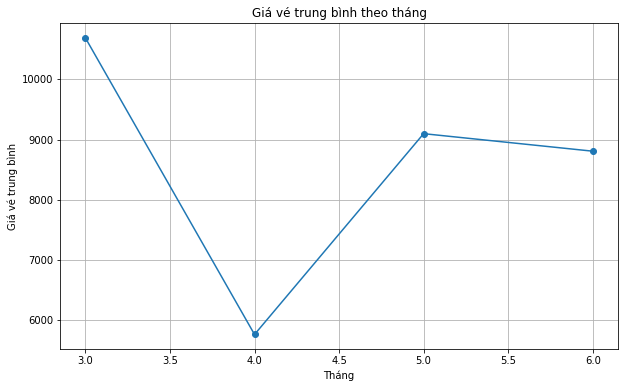

In [142]:
#Giá vé tăng khi nào
merged_DT['Date_of_Journey'] = pd.to_datetime(merged_DT['Date_of_Journey'], format='%d/%m/%Y')

merged_DT['Month_of_Journey'] = merged_DT['Date_of_Journey'].dt.month
print(merged_DT['Month_of_Journey'].unique())

average_price_by_month = merged_DT.groupby('Month_of_Journey')['Price'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_price_by_month.index, average_price_by_month.values, marker='o')
plt.title('Giá vé trung bình theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Giá vé trung bình')
plt.grid(True)
plt.show()



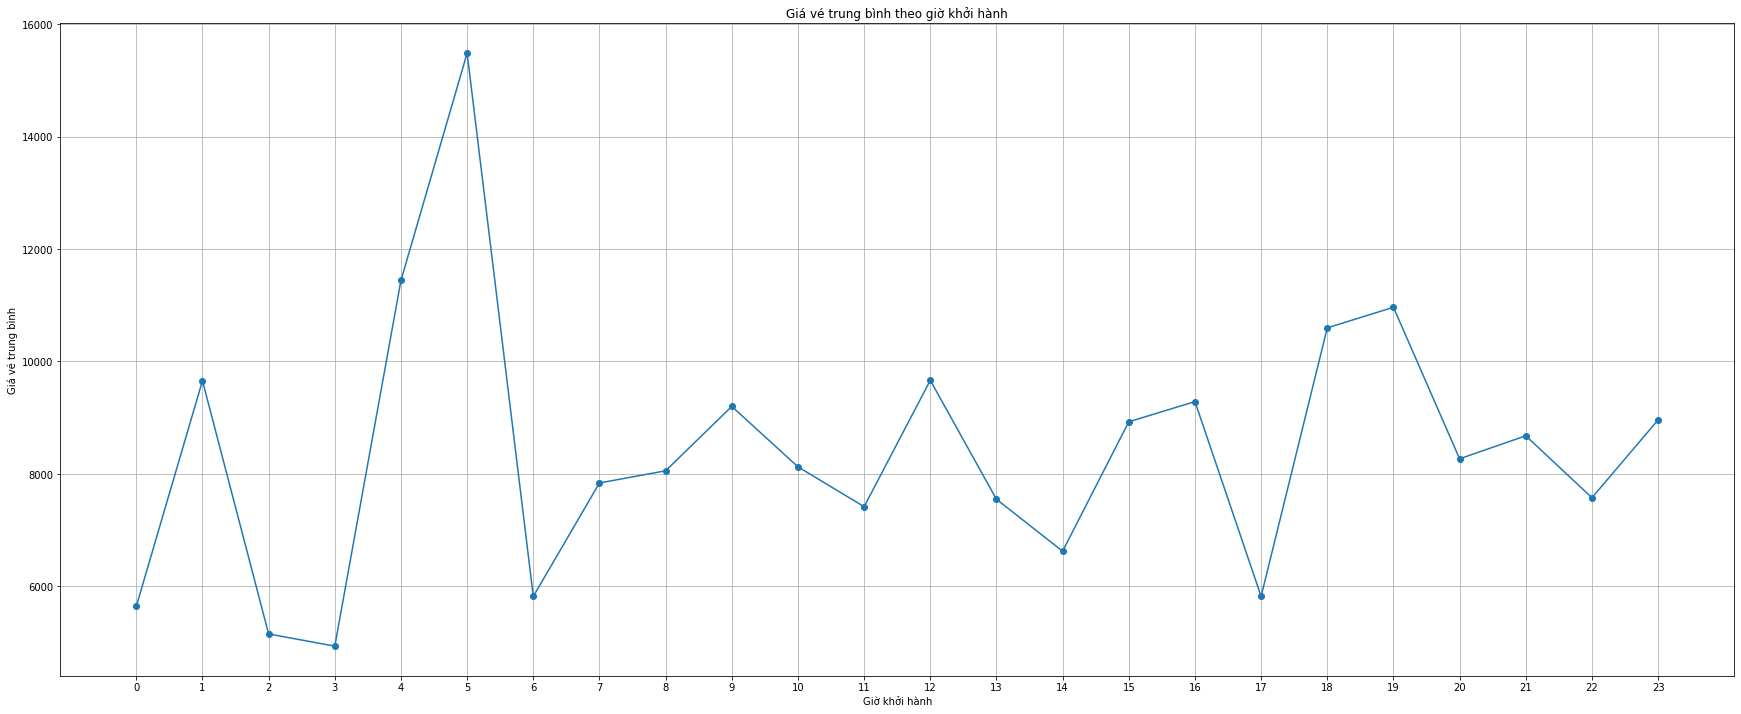

In [114]:
merged_DT['Arri_Time'] = merged_DT['Arrival_Time'].astype(str).str[:5]

merged_DT['Arri_Time'] = pd.to_datetime(merged_DT['Arri_Time'], format='%H:%M')
#

merged_DT['Arri_Time'] = merged_DT['Arri_Time'].dt.hour

# Tính giá vé trung bình theo khoảng thời gian khởi hành và đến
average_price_by_dept_time = merged_DT.groupby('Arri_Time')['Price'].mean()
#average_price_by_arrival_time = merged_DT.groupby('Arri_Time')['Price'].mean()

# Vẽ đồ thị
plt.figure(figsize=(30, 12))

# Đồ thị giá vé theo giờ khởi hành
plt.plot(average_price_by_dept_time.index, average_price_by_dept_time.values, marker='o')
plt.title('Giá vé trung bình theo giờ khởi hành')
plt.xlabel('Giờ khởi hành')
plt.ylabel('Giá vé trung bình')
plt.xticks(range(24))
plt.grid(True)
plt.show()

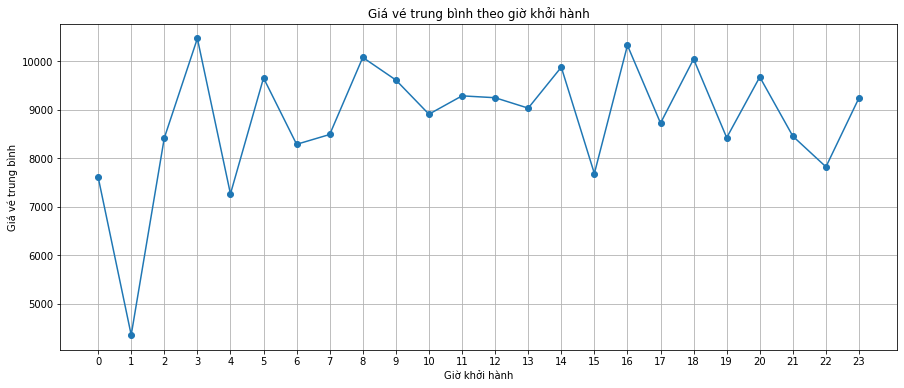

In [124]:
merged_DT['Dep_Time1'] = pd.to_datetime(merged_DT['Dep_Time'], format='%H:%M').dt.hour

# Tính giá vé trung bình theo giờ khởi hành
average_price_by_dept_time = merged_DT.groupby('Dep_Time1')['Price'].mean()

# Vẽ đồ thị
plt.figure(figsize=(15, 6))

# Đồ thị giá vé theo giờ khởi hành
plt.plot(average_price_by_dept_time.index, average_price_by_dept_time.values, marker='o')
plt.title('Giá vé trung bình theo giờ khởi hành')
plt.xlabel('Giờ khởi hành')
plt.ylabel('Giá vé trung bình')
plt.xticks(range(24))  # Đặt chú thích cho mỗi giờ
plt.grid(True)
plt.show()

In [126]:
print(merged_DT['Month_of_Journey'].unique())

[3 5 6 4]


In [106]:
print(merged_DT['Dep_Time'].unique())


['22:20' '05:50' '09:25' '18:05' '16:50' '09:00' '18:55' '08:00' '08:55'
 '11:25' '09:45' '20:20' '11:40' '21:10' '17:15' '16:40' '08:45' '14:00'
 '20:15' '16:00' '14:10' '22:00' '04:00' '21:25' '21:50' '07:00' '07:05'
 '09:50' '14:35' '10:35' '15:05' '14:15' '06:45' '20:55' '11:10' '05:45'
 '19:00' '23:05' '11:00' '09:35' '21:15' '23:55' '19:45' '08:50' '15:40'
 '06:05' '15:00' '13:55' '05:55' '13:20' '05:05' '06:25' '17:30' '08:20'
 '19:55' '06:30' '14:05' '02:00' '09:40' '08:25' '20:25' '13:15' '02:15'
 '16:55' '20:45' '05:15' '19:50' '20:00' '06:10' '19:30' '04:45' '12:55'
 '18:15' '17:20' '15:25' '23:00' '12:00' '14:45' '11:50' '11:30' '14:40'
 '19:10' '06:00' '23:30' '07:35' '13:05' '12:30' '15:10' '12:50' '18:25'
 '16:30' '00:40' '06:50' '13:00' '19:15' '01:30' '17:00' '10:00' '19:35'
 '15:30' '12:10' '16:10' '20:35' '22:25' '21:05' '05:35' '05:10' '06:40'
 '15:15' '00:30' '08:30' '07:10' '05:30' '14:25' '05:25' '10:20' '17:45'
 '13:10' '22:10' '04:55' '17:50' '21:20' '06:20' '1

In [119]:
groups = [merged_DT[merged_DT['Dep_Time1'] == hour]['Price'] for hour in merged_DT['Dep_Time1'].unique()]

# Thực hiện one-way ANOVA
f_statistic, p_value = f_oneway(*groups)

# Kiểm tra kết quả
print(f'F-statistic: {f_statistic:.4f}')
print(f'p-value: {p_value:.4f}')

# Kiểm tra giả thiết
alpha = 0.05
if p_value < alpha:
    print("Có đủ bằng chứng để bác bỏ giả thiết H0.")
else:
    print("Không đủ bằng chứng để bác bỏ giả thiết H0.")

F-statistic: 14.7221
p-value: 0.0000
Có đủ bằng chứng để bác bỏ giả thiết H0.


In [120]:
groups = [merged_DT[merged_DT['Arri_Time'] == hour]['Price'] for hour in merged_DT['Arri_Time'].unique()]

# Thực hiện one-way ANOVA
f_statistic, p_value = f_oneway(*groups)

# Kiểm tra kết quả
print(f'F-statistic: {f_statistic:.4f}')
print(f'p-value: {p_value:.4f}')

# Kiểm tra giả thiết
alpha = 0.05
if p_value < alpha:
    print("Có đủ bằng chứng để bác bỏ giả thiết H0.")
else:
    print("Không đủ bằng chứng để bác bỏ giả thiết H0.")

F-statistic: 69.9866
p-value: 0.0000
Có đủ bằng chứng để bác bỏ giả thiết H0.


In [118]:
from scipy.stats import f_oneway

In [141]:
date_groups = [merged_DT[merged_DT['Month_of_Journey'] == month ]['Price'] for month in merged_DT['Month_of_Journey'].unique()]

# Thực hiện one-way ANOVA
f_statistic, p_value = f_oneway(*date_groups)

# Kiểm tra kết quả
print(f'F-statistic: {f_statistic:.4f}')
print(f'p-value: {p_value:.4f}')

# Kiểm tra giả thiết
alpha = 0.05
if p_value < alpha:
    print("Có đủ bằng chứng để bác bỏ giả thiết H0.")
else:
    print("Không đủ bằng chứng để bác bỏ giả thiết H0.")

F-statistic: 326.1414
p-value: 0.0000
Có đủ bằng chứng để bác bỏ giả thiết H0.


In [138]:
print(df_DT1['Date_of_Journey'].unique())

['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
